Initial stuff

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_context('talk')
%matplotlib inline

# Load data

In [2]:
year_list = [i for i in range(1999,2019)]
df_d = {y:pd.read_csv("https://www.scimagojr.com/journalrank.php?area=2000&year=%.0f&out=xls"%y,delimiter=";") for y in year_list}

Set ranking variable

In [3]:
rank_var = "H index"

Define specific year of interest for plotting

In [4]:
y_list_short = [1999,2010,2018]

# Lorenz curves

In [5]:
def lorenz(X_in):
    X = np.sort(X_in)
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0)
    X_lorenz[0], X_lorenz[-1]
    X=[i/len(X) for i in range(len(X)+1)]
    return X,X_lorenz

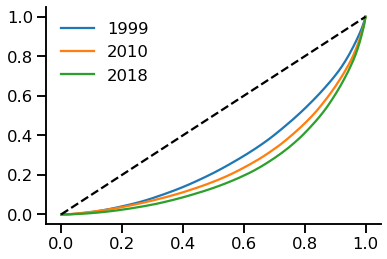

In [6]:
fig,ax = plt.subplots()
for y in y_list_short :
    df = df_d[y]
    x,l = lorenz(df[rank_var].values)
    ax.plot(x,l,label=y)
sns.despine()
ax.plot([0,1],[0,1],color='k',ls='--')
ax.legend(frameon=False)

# Quantile plots

In [7]:
eval_range = [i/100 for i in range(0,101)]

Text(0.5, 0, 'Quantile')

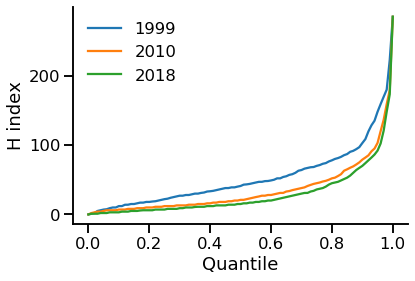

In [8]:
fig,ax = plt.subplots()
for y in [1999,2010,2018]:
    df = df_d[y]
    ax.plot(eval_range,df[rank_var].quantile(eval_range),label=y)
sns.despine()
ax.legend(frameon=False)
ax.set_ylabel(rank_var)
ax.set_xlabel('Quantile')

# Mean of top-5 versus mean of rest

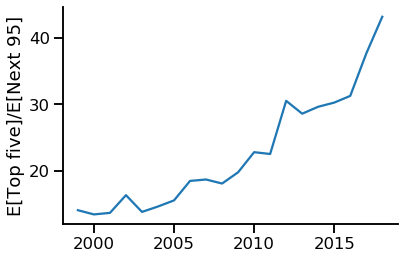

In [9]:
share = []
for y in year_list:
    df = df_d[y]
    s = df[rank_var].sort_values().iloc[-5:].mean()/df[rank_var].iloc[-100:-5].mean()
    share +=[s]
    
fig,ax = plt.subplots()
ax.plot(year_list,share)
ax.set_ylabel("E[Top five]/E[Next 95]")
sns.despine()

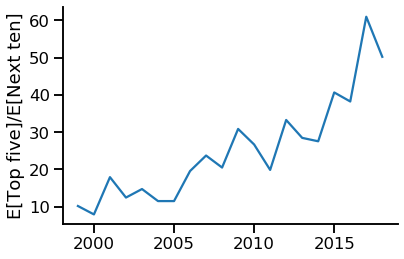

In [10]:
share = []
for y in year_list:
    df = df_d[y]
    s = df[rank_var].sort_values().iloc[-5:].mean()/df[rank_var].iloc[-15:-5].mean()
    share +=[s]
    
fig,ax = plt.subplots()
ax.plot(year_list,share)
ax.set_ylabel("E[Top five]/E[Next ten]")
sns.despine()